<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tratamiento-de-outliers-o-valores-perdidos" data-toc-modified-id="Tratamiento-de-outliers-o-valores-perdidos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tratamiento de <em>outliers</em> o valores perdidos</a></span></li><li><span><a href="#Eliminar-outliers" data-toc-modified-id="Eliminar-outliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eliminar <em>outliers</em></a></span></li><li><span><a href="#Reemplazar" data-toc-modified-id="Reemplazar-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reemplazar</a></span></li></ul></div>

# Tratamiento de *outliers* o valores perdidos

Los *outliers* o valores perdidos son observaciones anormales en nuestros datos que puede afectar potencialmente nuestros análisis. 

> Es decir, un *outlier* es una observación dentro de nuestros datos que nos es consistente con el resto, que se escapa. 

Imaginemos que estamos midiendo el peso de las alumnas de una clase y son los siguientes:

```python
pesos = [92.31, 76.4, 87.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```

- el peso máximo es de 92.31


- el peso mínimo es de 60.86


- la media del peso de la clase sería 77.085. 


- la distancia del máximo y del mínimo a la media es de 14.504 y 16.94 respectivamente. 

**Como vemos la media se sitúa en la mitad del intervalo y nos podría dar una muy buena estimación del peso de la clase** 


Imaginemos ahora que el peso de los 10 las alumnas son: 

```python
pesos2 = [92.31, 76.4, 117.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```
En este caso: 

- el peso máximo es de 117.3


- el peso mínimo es de 60.86


- la media del peso de la clase sería 80.805. 


- la distancia del máximo y del mínimo a la media es de 36.49 y 19.94 respectivamente. 

**En este caso la media ya no está situada aproximadamente en la mitad del intervalo**. El efecto de la alumna que tiene un mayor perso ha hecho que la media aritmética se haya desplazado hacia el valor máximo y por lo tanto ya no es tan buena representación de como se reparten los pesos en la clase.  


Es en este caso, cuando el tratamiento de los *outliers* debe ser solucionado. Esto lo podemos hacer de distintas formas: 

- Eliminación de esos registros 


- Reemplazar por la media, mediana, moda...


- Mantenerlos (si el problema a resolver tiene que ver con outliers). 


Pero antes de ponernos a quitar datos o reemplazarlos tenemos que identificar cuales son los *outliers* en nuestro datos. 

- Lo podemos hacer visualmente usando un `boxplot`. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df = pd.read_csv("data/california.csv", index_col = 0)
nuevas_columnas = {
    "ic2" : "num_habitaciones", 
    "ic3": "num_vecinos", 
    "ic4": "total_habitaciones", 
    "ic5": "total_baños", 
    "avggift": "dist_playa"}

df.rename(columns = nuevas_columnas, inplace = True)
df.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
0,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN
1,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667
2,FL,F,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111
3,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778
4,FL,F,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000


In [4]:
# seleccionamos solo aquellas variables numéricas

df_numericas = df.select_dtypes(include=np.number)

In [5]:
df_numericas.head(2)

,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
0,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN
1,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667


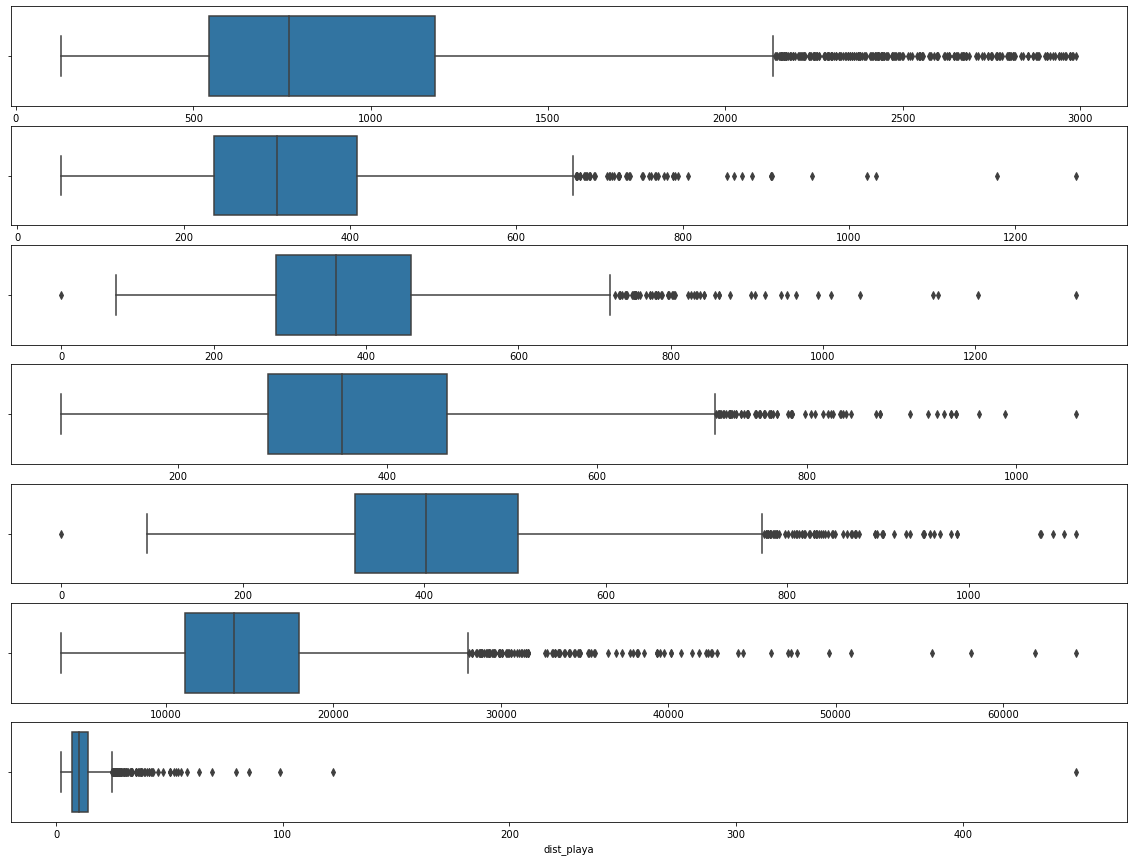

In [7]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

Hemos identificado visualmente los *outliers* en nuestras variables numéricas, pero en realidad no sabemos que valores son los que son los *outliers*. ¿Cómo lo podríamos hacer?

Calcularemos  el rango intercuartílico (IQR) siguiendo los siguientes pasos: 

- Calcular el primer cuartil (Q1, 25%): donde el 25% de los datos son menores o iguales al valor del Q1. 


- Calcular el tercer cuartil (Q3, 75%): donde el 75% de los datos son menores o iguales al valor de Q3


- Calcular el rango intercuartil (IQR), es la diferencia entre el Q3 y Q1

```
IQR  = Q3 - Q1
```

> Todos los valors que sean **menores que `Q1 - 1.5IQR`** o **mayores que `Q3 + 1.5IQR`** serán considerados outliers. 

**Empecemos con la variable `bmi`**

Para calcular los cuartiles recurriremos a la librería NumPy donde encontratemos los siguientes métodos: 

- `np.percentile`: lo usaremos cuando **no** tengamos **nan** entre nuestros valores. 


- `np.nanpercentile`: lo usaremos cuando tengamos nan entre nuestros valores. 

En ambos casos tendremos que pasarle: 

- La columna sobre la que queramos calcular los cuartiles 


- El cuartil que queremos calcular. 

In [9]:
df.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
0,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN
1,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667
2,FL,F,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111
3,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778
4,FL,F,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000


In [10]:
# cálculo del Q1
Q1 = np.nanpercentile(df['num_vecinos'], 25)
Q1

286.0

In [11]:
# cálculo del Q3
Q3 = np.nanpercentile(df['num_vecinos'], 75)
Q3

457.0

In [12]:
#calculemos el IQR 

IQR = Q3 - Q1
IQR

171.0

In [13]:
# multiplicamos el IQR por 1.5

outlier_step = 1.5 * IQR
outlier_step

256.5

Ahora es el momento de filtrar nuestros datos filtrar/eliminar aquellos datos que sean *outliers*, es decir, vamos a crearnos un *dataframe* con los datos que cumplan dos condiciones: 

- Que sean menor que el valor de Q1 - outlier_step


- Que sean mayores que el valor de Q3 + outlier_step

In [14]:
outliers_data = df[(df["num_vecinos"] < Q1 - outlier_step) | (df["num_vecinos"] > Q3 + outlier_step)]

In [15]:
outliers_data

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
5,NV,F,1569.0,673.0,672.0,785.0,781.0,25775.0,13.000000
42,TX,M,1043.0,610.0,682.0,731.0,788.0,NaN,13.250000
52,CO,M,1236.0,622.0,630.0,727.0,737.0,25882.0,6.076923
85,CA,F,2750.0,668.0,701.0,717.0,781.0,26199.0,11.444444
174,TX,F,1274.0,789.0,798.0,804.0,825.0,26360.0,6.409091
...,...,...,...,...,...,...,...,...,...
3052,CA,F,2885.0,737.0,773.0,798.0,824.0,NaN,53.857143
3175,GA,F,2159.0,871.0,905.0,938.0,968.0,39328.0,7.333333
3229,GA,M,1483.0,673.0,695.0,744.0,774.0,27393.0,20.000000
3279,CA,M,2631.0,689.0,753.0,772.0,816.0,38138.0,19.615385


In [16]:
# sacamos los índices de los outliers, para saber que filas son las que tienen los outliers
x = list(outliers_data.index)
x 

[5,
 42,
 52,
 85,
 174,
 190,
 192,
 252,
 300,
 373,
 375,
 385,
 407,
 427,
 439,
 547,
 581,
 609,
 694,
 755,
 792,
 857,
 871,
 910,
 986,
 1070,
 1134,
 1168,
 1215,
 1326,
 1431,
 1446,
 1464,
 1502,
 1512,
 1527,
 1606,
 1725,
 1742,
 1836,
 1872,
 1921,
 1926,
 1947,
 2044,
 2113,
 2121,
 2215,
 2217,
 2240,
 2257,
 2266,
 2370,
 2388,
 2393,
 2425,
 2439,
 2471,
 2485,
 2490,
 2528,
 2540,
 2807,
 2947,
 2964,
 2971,
 2974,
 3039,
 3052,
 3175,
 3229,
 3279,
 3296]

Pero esto es un poco rollo si tuvieramos que ejecutar todas estas líneas para cada columna numérica, por lo que vamos a crearnos una función: 

In [17]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [18]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['median_home_val', 'median_household_income', 'num_habitaciones',
       'num_vecinos', 'total_habitaciones', 'total_baños', 'dist_playa'],
      dtype='object')

In [19]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)
print(ind)

{'median_home_val': [19, 29, 47, 58, 65, 71, 85, 116, 128, 143, 144, 162, 168, 169, 172, 173, 209, 250, 281, 289, 299, 304, 307, 336, 365, 370, 375, 376, 380, 382, 390, 399, 404, 405, 407, 424, 427, 452, 519, 534, 550, 572, 581, 589, 609, 614, 637, 694, 712, 735, 736, 745, 755, 808, 820, 823, 826, 851, 857, 871, 893, 911, 919, 937, 944, 983, 1006, 1020, 1024, 1045, 1046, 1081, 1097, 1098, 1113, 1118, 1164, 1168, 1185, 1186, 1216, 1233, 1255, 1269, 1293, 1321, 1326, 1343, 1368, 1370, 1389, 1392, 1397, 1407, 1411, 1429, 1431, 1443, 1453, 1473, 1487, 1508, 1518, 1548, 1606, 1607, 1624, 1670, 1674, 1679, 1720, 1733, 1787, 1795, 1803, 1806, 1810, 1819, 1853, 1893, 1911, 1921, 1926, 1947, 1959, 1976, 1979, 1989, 1995, 2007, 2014, 2025, 2027, 2029, 2032, 2055, 2070, 2073, 2095, 2107, 2109, 2111, 2121, 2126, 2136, 2141, 2147, 2153, 2155, 2183, 2237, 2240, 2252, 2263, 2265, 2266, 2285, 2293, 2324, 2328, 2352, 2384, 2389, 2430, 2433, 2447, 2451, 2461, 2506, 2513, 2514, 2518, 2531, 2558, 2560, 25

Ahora ya podremos hacer el tratamiento correcto de los *outliers*, como comentabamos un poco más arriba: 

- Eliminarlos

- Reemplazarlos

- Mantenerlos. 

# Eliminar *outliers* 

En este caso solo vamos a necesitar los índices. Por lo que necesitamos acceder a los valores de nuestro diccionario, para luego usarlos para elminarlos. 

In [20]:
# sacamos los valores de nuestro diccionario. 

valores = list(ind.values())

In [21]:
# pero ojo!! Esto es una lista de listas, por lo que necesitaremos aplanarla, ya que el método drop acepta listas.

print(valores)

[[19, 29, 47, 58, 65, 71, 85, 116, 128, 143, 144, 162, 168, 169, 172, 173, 209, 250, 281, 289, 299, 304, 307, 336, 365, 370, 375, 376, 380, 382, 390, 399, 404, 405, 407, 424, 427, 452, 519, 534, 550, 572, 581, 589, 609, 614, 637, 694, 712, 735, 736, 745, 755, 808, 820, 823, 826, 851, 857, 871, 893, 911, 919, 937, 944, 983, 1006, 1020, 1024, 1045, 1046, 1081, 1097, 1098, 1113, 1118, 1164, 1168, 1185, 1186, 1216, 1233, 1255, 1269, 1293, 1321, 1326, 1343, 1368, 1370, 1389, 1392, 1397, 1407, 1411, 1429, 1431, 1443, 1453, 1473, 1487, 1508, 1518, 1548, 1606, 1607, 1624, 1670, 1674, 1679, 1720, 1733, 1787, 1795, 1803, 1806, 1810, 1819, 1853, 1893, 1911, 1921, 1926, 1947, 1959, 1976, 1979, 1989, 1995, 2007, 2014, 2025, 2027, 2029, 2032, 2055, 2070, 2073, 2095, 2107, 2109, 2111, 2121, 2126, 2136, 2141, 2147, 2153, 2155, 2183, 2237, 2240, 2252, 2263, 2265, 2266, 2285, 2293, 2324, 2328, 2352, 2384, 2389, 2430, 2433, 2447, 2451, 2461, 2506, 2513, 2514, 2518, 2531, 2558, 2560, 2578, 2582, 2597, 260

In [22]:
# hacemos una list comprehension para aplanar nuestra lista de listas

valores = [indice for sublista in valores for indice in sublista]
print(valores)

[19, 29, 47, 58, 65, 71, 85, 116, 128, 143, 144, 162, 168, 169, 172, 173, 209, 250, 281, 289, 299, 304, 307, 336, 365, 370, 375, 376, 380, 382, 390, 399, 404, 405, 407, 424, 427, 452, 519, 534, 550, 572, 581, 589, 609, 614, 637, 694, 712, 735, 736, 745, 755, 808, 820, 823, 826, 851, 857, 871, 893, 911, 919, 937, 944, 983, 1006, 1020, 1024, 1045, 1046, 1081, 1097, 1098, 1113, 1118, 1164, 1168, 1185, 1186, 1216, 1233, 1255, 1269, 1293, 1321, 1326, 1343, 1368, 1370, 1389, 1392, 1397, 1407, 1411, 1429, 1431, 1443, 1453, 1473, 1487, 1508, 1518, 1548, 1606, 1607, 1624, 1670, 1674, 1679, 1720, 1733, 1787, 1795, 1803, 1806, 1810, 1819, 1853, 1893, 1911, 1921, 1926, 1947, 1959, 1976, 1979, 1989, 1995, 2007, 2014, 2025, 2027, 2029, 2032, 2055, 2070, 2073, 2095, 2107, 2109, 2111, 2121, 2126, 2136, 2141, 2147, 2153, 2155, 2183, 2237, 2240, 2252, 2263, 2265, 2266, 2285, 2293, 2324, 2328, 2352, 2384, 2389, 2430, 2433, 2447, 2451, 2461, 2506, 2513, 2514, 2518, 2531, 2558, 2560, 2578, 2582, 2597, 2601

In [23]:
valores = set(valores)

In [24]:
print(valores)

{3, 5, 2055, 8, 15, 2063, 19, 2068, 21, 2070, 2073, 29, 33, 42, 47, 2095, 52, 58, 2107, 2108, 2109, 2111, 65, 2113, 71, 2121, 2126, 85, 2136, 2141, 94, 2147, 2148, 101, 2153, 2155, 116, 2174, 128, 2176, 132, 2183, 2187, 2188, 143, 144, 2194, 151, 159, 162, 2215, 168, 169, 2217, 167, 172, 173, 174, 2229, 2237, 190, 2240, 192, 198, 2252, 2253, 209, 2257, 211, 2258, 2263, 2265, 2266, 2270, 2285, 2290, 2293, 250, 251, 252, 2302, 265, 2324, 2327, 2328, 281, 287, 289, 290, 2340, 299, 300, 2348, 2349, 2350, 304, 2352, 307, 2360, 2370, 336, 2384, 2386, 2388, 2389, 343, 2393, 355, 2410, 365, 368, 370, 2420, 373, 375, 376, 2425, 380, 382, 2430, 2433, 385, 390, 2439, 399, 2447, 2448, 2451, 404, 405, 403, 407, 2461, 2471, 424, 427, 434, 435, 2485, 439, 2490, 452, 2506, 2513, 2514, 2518, 476, 2528, 2531, 484, 2540, 2556, 2558, 2560, 519, 2578, 534, 2582, 2592, 547, 2597, 550, 2601, 562, 572, 2625, 581, 583, 589, 2642, 2644, 601, 609, 2657, 2661, 614, 2675, 2681, 637, 2695, 2696, 650, 2712, 2714, 27

In [25]:
df.shape

(3333, 9)

In [26]:
# nos hacems¡os una copia del dataframe original

df_sin_outliers2 = df.copy()

In [27]:
# eliminamos usando la lista de índices las filas que hemos identificado como outliers. 

final = df_sin_outliers2.drop(df_sin_outliers2.index[list(valores)] )

Por último chequeamos las filas del *dataframe* nuevo y comprobamos si se han borrado los registros que queríamos. 

In [28]:
final.shape

(2875, 9)

# Reemplazar

También podemos reemplazar los valores de los *outliers* por la media o la mediana. Recordamos que la función para detectar los *outliers* nos devolvía un diccionario, donde las *keys* eran el nombre de las columnas y los *values* la lista de los índices donde tenemos nulos. 

In [29]:
print(ind)

{'median_home_val': [19, 29, 47, 58, 65, 71, 85, 116, 128, 143, 144, 162, 168, 169, 172, 173, 209, 250, 281, 289, 299, 304, 307, 336, 365, 370, 375, 376, 380, 382, 390, 399, 404, 405, 407, 424, 427, 452, 519, 534, 550, 572, 581, 589, 609, 614, 637, 694, 712, 735, 736, 745, 755, 808, 820, 823, 826, 851, 857, 871, 893, 911, 919, 937, 944, 983, 1006, 1020, 1024, 1045, 1046, 1081, 1097, 1098, 1113, 1118, 1164, 1168, 1185, 1186, 1216, 1233, 1255, 1269, 1293, 1321, 1326, 1343, 1368, 1370, 1389, 1392, 1397, 1407, 1411, 1429, 1431, 1443, 1453, 1473, 1487, 1508, 1518, 1548, 1606, 1607, 1624, 1670, 1674, 1679, 1720, 1733, 1787, 1795, 1803, 1806, 1810, 1819, 1853, 1893, 1911, 1921, 1926, 1947, 1959, 1976, 1979, 1989, 1995, 2007, 2014, 2025, 2027, 2029, 2032, 2055, 2070, 2073, 2095, 2107, 2109, 2111, 2121, 2126, 2136, 2141, 2147, 2153, 2155, 2183, 2237, 2240, 2252, 2263, 2265, 2266, 2285, 2293, 2324, 2328, 2352, 2384, 2389, 2430, 2433, 2447, 2451, 2461, 2506, 2513, 2514, 2518, 2531, 2558, 2560, 25

In [30]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    if k == "bmi":
        media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio.  
    else: 
        mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = mediana 
        

In [31]:
df_numericas2 = df.select_dtypes(include = np.number)

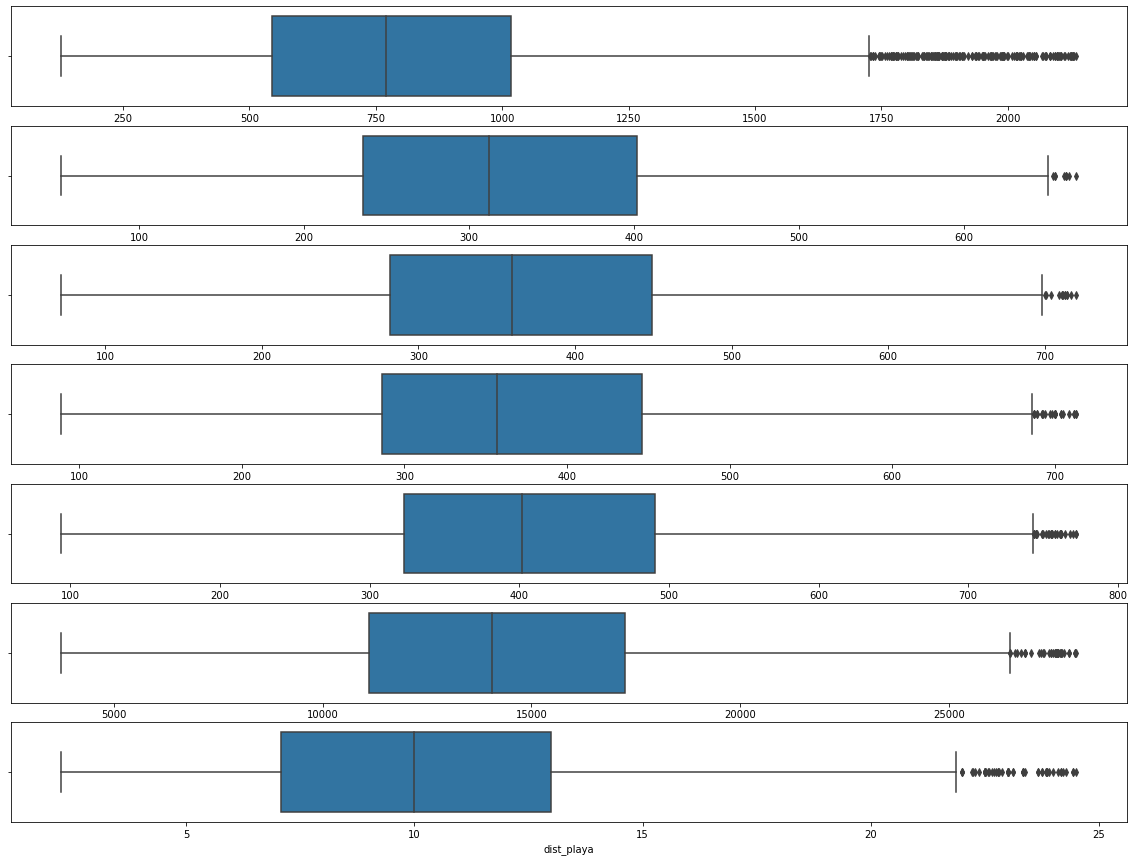

In [33]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas2.columns)):
    sns.boxplot(x=df_numericas2.columns[i], data=df_numericas2, ax=ax[i])
plt.show()

In [29]:
# guardamos el csv con los valores cambiados

df.to_csv("insurance_sin_outliers.csv")